# Feed Forward Neural Network

By: Avia Oren & Maya Hayat

#### Classification Task

Classifying the Hebrew letters "ב" "מ" "ל" using the "Feed forward neural network"

### Imports

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

### Reading data 

In [2]:
ogdata = pd.read_csv('C:/Users/Maya/OneDrive/Desktop/vectors.csv', sep=',')

In [3]:
ogdata

,1,-1,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,...,-1.63,-1.64,-1.65,-1.66,-1.67,-1.68,-1.69,-1.70,-1.71,-1.72
0,1,-1,-1,-1,-1,1,1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,1,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,-1,-1,-1,1,1,-1,-1,-1
3,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,3,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,-1
629,3,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
630,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
631,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


In [4]:
ogdata = ogdata[~ogdata.iloc[:, 1:].apply(lambda row: all(val == -1 for val in row), axis=1)]
ogdata = ogdata[~ogdata.iloc[:, 1:].apply(lambda row: all(val == 1 for val in row), axis=1)]

In [5]:
data = ogdata

In [6]:
data

,1,-1,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,...,-1.63,-1.64,-1.65,-1.66,-1.67,-1.68,-1.69,-1.70,-1.71,-1.72
0,1,-1,-1,-1,-1,1,1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,1,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,-1,-1,-1,1,1,-1,-1,-1
3,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,3,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,-1
629,3,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
630,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
631,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


## Comparing between "Bet" & "Lamed"

In [7]:
data = ogdata[ogdata['1'] != 3] #Eliminating "Mem" denoted by 3

Accuracy 1: 0.95


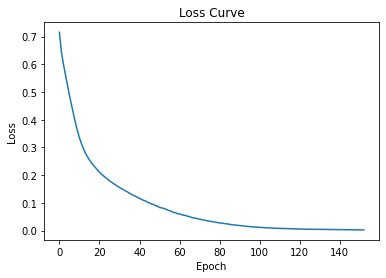

Accuracy 2: 0.94


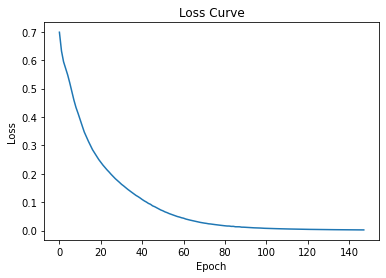

Accuracy 3: 0.94


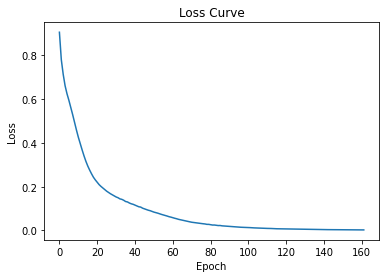

Accuracy 4: 0.90


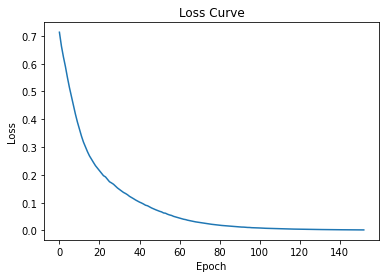

Accuracy 5: 0.87


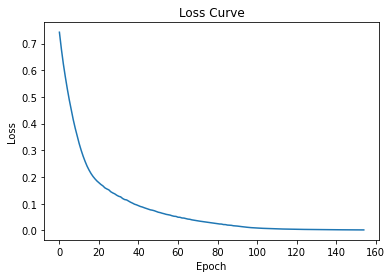

Average Accuracy: 92.05%
Standard Deviation: 3.37%


In [8]:
# Shuffle the data
data = shuffle(data, random_state=42)

# Separate the labels (y) and features (X)
X = data.iloc[:, 1:]  # The remaining columns are the features
y = np.where(data.iloc[:, 0].values != 2, -1, 1)  # The first column contains the labels, changing the labels to -1, 1

n_repeats = 5
test_size = 0.2
n_splits = int(1 / test_size)
accuracies = []

for i in range(n_repeats):
    # Split the data into training and test sets
    split_index = int((i % n_splits) * len(X) * test_size)
    X_test = X[split_index:split_index + int(len(X) * test_size)]
    y_test = y[split_index:split_index + int(len(X) * test_size)]
    X_train = np.concatenate([X[:split_index], X[split_index + int(len(X) * test_size):]])
    y_train = np.concatenate([y[:split_index], y[split_index + int(len(X) * test_size):]])

    
    mlp = MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='relu', solver='adam', max_iter=1000)
    
    # Train the model
    history = mlp.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    accuracy = mlp.score(X_test, y_test)
    accuracies.append(accuracy)
    print(f'Accuracy {i+1}: {accuracy:.2f}')
    
    plt.plot(history.loss_curve_)
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    

    
std_dev = np.std(accuracies) / np.mean(accuracies) * 100
average_accuracy = np.mean(accuracies) * 100
print(f'Average Accuracy: {average_accuracy:.2f}%')
print(f'Standard Deviation: {std_dev:.2f}%')

## Comparing between "Bet" & "Mem"

In [9]:
data = ogdata[ogdata['1'] != 2] #Eliminating "Mem" denoted by 3

Accuracy 1: 0.90


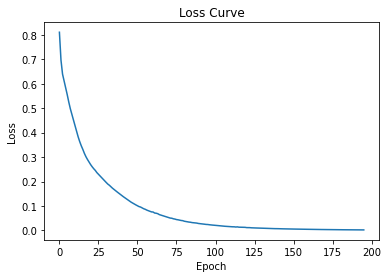

Accuracy 2: 0.94


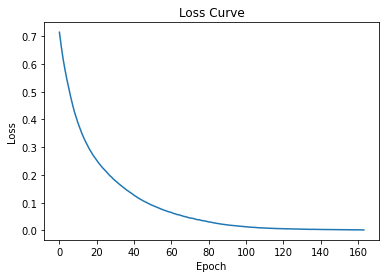

Accuracy 3: 0.83


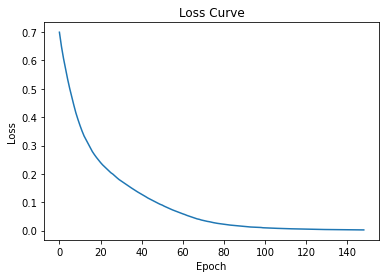

Accuracy 4: 0.90


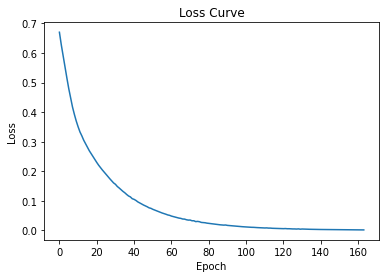

Accuracy 5: 0.81


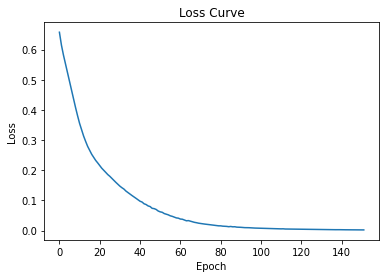

Average Accuracy: 87.71%
Standard Deviation: 5.66%


In [10]:
# Shuffle the data
data = shuffle(data, random_state=42)

# Separate the labels (y) and features (X)
X = data.iloc[:, 1:]  # The remaining columns are the features
y = np.where(data.iloc[:, 0].values != 3, -1, 1)  # The first column contains the labels, changing the labels to -1, 1

n_repeats = 5
test_size = 0.2
n_splits = int(1 / test_size)
accuracies = []

for i in range(n_repeats):
    # Split the data into training and test sets
    split_index = int((i % n_splits) * len(X) * test_size)
    X_test = X[split_index:split_index + int(len(X) * test_size)]
    y_test = y[split_index:split_index + int(len(X) * test_size)]
    X_train = np.concatenate([X[:split_index], X[split_index + int(len(X) * test_size):]])
    y_train = np.concatenate([y[:split_index], y[split_index + int(len(X) * test_size):]])

    
    mlp = MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='relu', solver='adam', max_iter=1000)
    
    # Train the model
    history = mlp.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    accuracy = mlp.score(X_test, y_test)
    accuracies.append(accuracy)
    print(f'Accuracy {i+1}: {accuracy:.2f}')
    
    plt.plot(history.loss_curve_)
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()    
    
    

    
std_dev = np.std(accuracies) / np.mean(accuracies) * 100
average_accuracy = np.mean(accuracies) * 100
print(f'Average Accuracy: {average_accuracy:.2f}%')
print(f'Standard Deviation: {std_dev:.2f}%')

## Comparing between "Lamed" & "Mem"

In [11]:
data = ogdata[ogdata['1'] != 1] #Eliminating "Mem" denoted by 3

Accuracy 1: 0.90


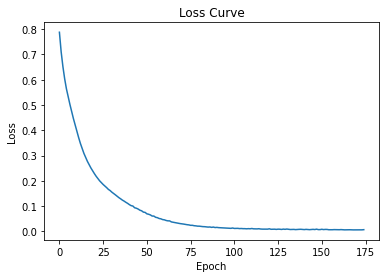

Accuracy 2: 0.89


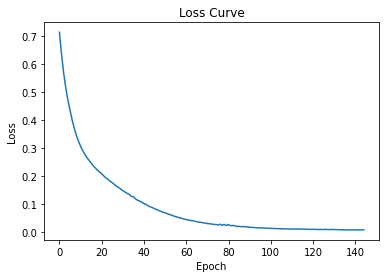

Accuracy 3: 0.90


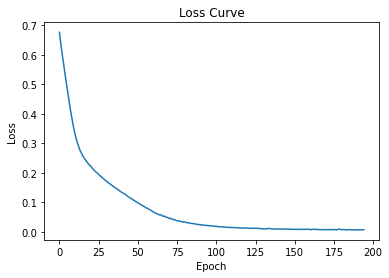

Accuracy 4: 0.87


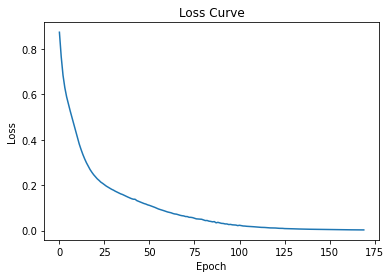

Accuracy 5: 0.90


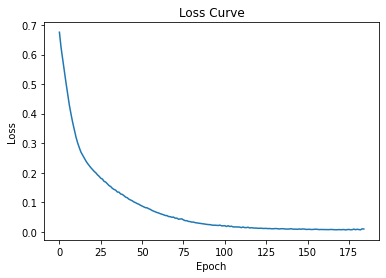

Average Accuracy: 89.27%
Standard Deviation: 1.59%


In [12]:
# Shuffle the data
data = shuffle(data, random_state=42)

# Separate the labels (y) and features (X)
X = data.iloc[:, 1:]  # The remaining columns are the features
y = np.where(data.iloc[:, 0].values != 3, -1, 1)  # The first column contains the labels, changing the labels to -1, 1

n_repeats = 5
test_size = 0.2
n_splits = int(1 / test_size)
accuracies = []

for i in range(n_repeats):
    # Split the data into training and test sets
    split_index = int((i % n_splits) * len(X) * test_size)
    X_test = X[split_index:split_index + int(len(X) * test_size)]
    y_test = y[split_index:split_index + int(len(X) * test_size)]
    X_train = np.concatenate([X[:split_index], X[split_index + int(len(X) * test_size):]])
    y_train = np.concatenate([y[:split_index], y[split_index + int(len(X) * test_size):]])

    
    mlp = MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='relu', solver='adam', max_iter=1000)
    
    # Train the model
    history = mlp.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    accuracy = mlp.score(X_test, y_test)
    accuracies.append(accuracy)
    print(f'Accuracy {i+1}: {accuracy:.2f}')
    
    plt.plot(history.loss_curve_)
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

    

    
std_dev = np.std(accuracies) / np.mean(accuracies) * 100
average_accuracy = np.mean(accuracies) * 100
print(f'Average Accuracy: {average_accuracy:.2f}%')
print(f'Standard Deviation: {std_dev:.2f}%')